# Lab 5 - Non-parametric distributions and bootstrap

Last lab we looked at parametric distributions like the normal distribution and exponential distribution.  Parametric distributions can be described by a (mathematical) function and their exact shape is determined by parameters (mean and standard deviation for the normal distribution; the rate $\lambda$ for the exponential distribution).

Today we will look at *non-parametric distributions* which either cannot be described by a mathematical function or the exact mathematical function is unknown.

We will start with the restaurant inspection data from Assignment 1.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# show all columns
pd.set_option('display.max_columns', None)

Create a dataframe with the restaurant inspection data, remembering to make the type of the inspection date column datetime.

In [2]:
inspection_data = pd.read_csv("restaurant_inspection.csv")

In [4]:
inspection_data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50074557,FISH VILLAGE,Queens,2007,127TH ST,11356.0,6468307299,Chinese,01/02/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,22.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.781449,-73.841413,407.0,19.0,91900.0,4099328.0,4.041720e+09,QN23
1,50086382,IL POSTO,Brooklyn,7409,AVENUE U,11234.0,7182414317,Italian,01/02/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,29.0,NaN,NaN,08/30/2019,Pre-permit (Operational) / Initial Inspection,40.621321,-73.905154,318.0,46.0,69602.0,3237484.0,3.084150e+09,BK45
2,41258823,LITTLE CAESARS,Bronx,1888,WESTCHESTER AVENUE,10472.0,3476571722,Pizza,01/02/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,4.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.832928,-73.861964,209.0,18.0,7200.0,NaN,2.000000e+00,BX55
3,50002053,THE LOCAL,Queens,13-02,44TH AVENUE,11101.0,3477385251,American,01/02/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,01/02/2019,08/30/2019,Cycle Inspection / Initial Inspection,40.749644,-73.947487,402.0,26.0,1900.0,4005221.0,4.004460e+09,QN31
4,50055374,FLORA BAR,Manhattan,945,MADISON AVE,10021.0,6317038780,American,01/02/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,11.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.773450,-73.964199,108.0,4.0,13000.0,1041666.0,1.013890e+09,MN40


In [7]:
inspection_data["INSPECTION DATE"] = pd.to_datetime(inspection_data["INSPECTION DATE"])

Question 3 of Assignment 1 asked if the mean inspection score in January was different from the mean inspection score in July.  We are going to look at this question in more detail.

First let's create a dataframe with only the January inspections.

In [17]:

january_filter = (inspection_data["INSPECTION DATE"].dt.month == 1)
jan_inspections = inspection_data[january_filter]
jan_inspections.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50074557,FISH VILLAGE,Queens,2007,127TH ST,11356.0,6468307299,Chinese,2019-01-02,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,22.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.781449,-73.841413,407.0,19.0,91900.0,4099328.0,4.041720e+09,QN23
1,50086382,IL POSTO,Brooklyn,7409,AVENUE U,11234.0,7182414317,Italian,2019-01-02,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,29.0,NaN,NaN,08/30/2019,Pre-permit (Operational) / Initial Inspection,40.621321,-73.905154,318.0,46.0,69602.0,3237484.0,3.084150e+09,BK45
2,41258823,LITTLE CAESARS,Bronx,1888,WESTCHESTER AVENUE,10472.0,3476571722,Pizza,2019-01-02,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,4.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.832928,-73.861964,209.0,18.0,7200.0,NaN,2.000000e+00,BX55
3,50002053,THE LOCAL,Queens,13-02,44TH AVENUE,11101.0,3477385251,American,2019-01-02,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,01/02/2019,08/30/2019,Cycle Inspection / Initial Inspection,40.749644,-73.947487,402.0,26.0,1900.0,4005221.0,4.004460e+09,QN31
4,50055374,FLORA BAR,Manhattan,945,MADISON AVE,10021.0,6317038780,American,2019-01-02,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,11.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.773450,-73.964199,108.0,4.0,13000.0,1041666.0,1.013890e+09,MN40


How many rows are in this new dataframe?  Recall we can find this out with the `.shape` property.

In [18]:
jan_inspections.shape # 11463 rows

(11463, 26)

Plot the histogram of the January inspection scores.

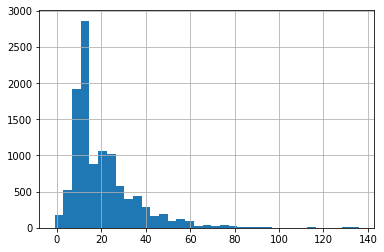

In [23]:
jan_inspections["SCORE"].hist(bins = 35)

Does the histogram look like either of the parametric distributions?

__The histogram looks like an exponential distribution__

It has some characteristics of an exponential distribution, but in this lab we will treat this sample as its own non-parametric distribution.

We want to know what range of values are likely for its mean.  To find this, we will *re-sample* from the sample, meaning we will create new samples of the same size by *sampling with replacement* from the original sample.  For each of the new samples, we will compute the mean.

In [27]:
# create an empty list
sample_means_jan = []
# loop to create 500 samples
for i in range(500):
    # sample once from the SCORE column with replacement
    sample = jan_inspections["SCORE"].sample(11463, replace = True)
    # compute the mean of the new sample
    sample_mean = sample.mean()
    # add the mean to the list
    sample_means_jan.append(sample_mean)

Plot a histogram of the sample means.  Remember to convert `sample_means_jan` into a Pandas Series first.

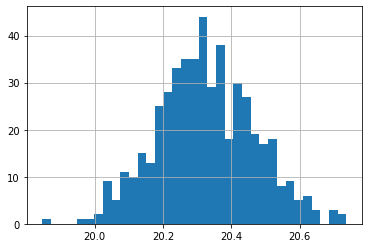

In [34]:
sample_means_jan = pd.Series(sample_means_jan)
sample_means_jan.hist(bins = 35)

This histogram is approximating the *sampling distribution of the mean*.

What parametric distribution does this histogram look like?  Do you remember why?

__This histogram looks like a normal distribution because of the Central Limit Theorem__

Let's find the range containing 95% of the sample means, which is also called the *95% confidence interval*.

In [37]:
# Find the 2.5 percentile of the means.  Only 2.5% of the sample means are smaller than this number.
sample_means_jan.quantile(0.025)

20.046429653253014

In [38]:
# Find the 97.5 percentile of the means.  97.5% of the sample means are smaller than this number, 
# so only 2.5% of the sample means are larger than this number.
sample_means_jan.quantile(0.975)

20.61168450551188

Therefore, the 95% confidence interval is approximately [20.0, 20.6].  The interpretation of a confidence interval is if we sample from a distribution and compute the 95% confidence interval, then 95% of the time this confidence interval will contain the true mean of the distribution.

Now, compute the 95% confidence interval for the mean of the July scores.

First, create a dataframe containing only the July inspections and find the number of rows.

In [53]:
july_filter = (inspection_data["INSPECTION DATE"].dt.month == 7)
july_data = inspection_data[july_filter]
july_data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
81776,50084649,FOUNDATION RESTAURANT & LOUNGE,Brooklyn,1254,FLATBUSH AVE,11226.0,7189752122,American,2019-07-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,48.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.639777,-73.954938,314.0,40.0,51601.0,3120303.0,3.052090e+09,BK42
81777,50072931,FENG CHA,Manhattan,99B,CHRYSTIE ST,10002.0,9175582988,Café/Coffee/Tea,2019-07-01,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Y,20.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.717855,-73.993983,103.0,1.0,1600.0,NaN,1.000000e+00,MN27
81778,50052779,AMAMI SUSHI,Brooklyn,57,NASSAU AVE,11222.0,9179091568,Japanese,2019-07-01,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Y,27.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.723340,-73.952118,301.0,33.0,56900.0,3066005.0,3.026440e+09,BK76
81779,50091736,DOMINO'S PIZZA,Bronx,946,SOUTHERN BLVD,10459.0,2035360660,Pizza,2019-07-01,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,11.0,NaN,NaN,08/30/2019,Pre-permit (Operational) / Initial Inspection,40.821476,-73.891666,202.0,17.0,11900.0,2094369.0,2.027420e+09,BX27
81780,40873138,WIMPY'S RESTAURANT,Manhattan,1822,AMSTERDAM AVENUE,10031.0,2122818989,American,2019-07-01,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,24.0,B,07/01/2019,08/30/2019,Cycle Inspection / Re-inspection,40.828576,-73.945173,109.0,7.0,23700.0,1062155.0,1.020820e+09,MN04


Next create 500 bootstrap samples (samples of the same size with replacement) of the July inspection scores:

In [54]:
july_score_means = []
for i in range(500): 
    sample = july_data["SCORE"].sample(len(july_data["SCORE"]), replace = True) 
    sample_mean = sample.mean()
    july_score_means.append(sample_mean)

Plot the histogram of the means:

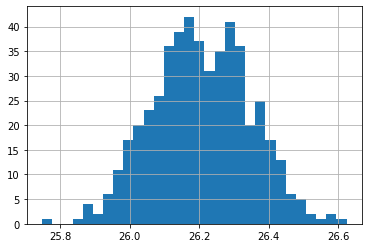

In [56]:
july_score_means = pd.Series(july_score_means)
july_score_means.hist(bins = 30)

Compute the 95% confidence interval for the means of the bootstrap samples of the July scores:

In [58]:
low = july_score_means.quantile(0.025)
low

25.942365421526134

In [63]:
high = july_score_means.quantile(0.975)
high

print("The confidence interval is (%.2f,%.2f)" % (low,high))

The confidence interval is (25.94,26.47)


What's your 95% confidence interval?

__(25.94,26.47)__

Does it overlap with your 95% confidence interval of the mean of the January scores?

__They do not overlap__

Since these two confidence intervals will contain the true means 95% of the time, if the intervals do not overlap, we can say that there is a statistically significant difference in the January and July score means.

We can visually check this too by plotting the two histograms of the means on the same plot:

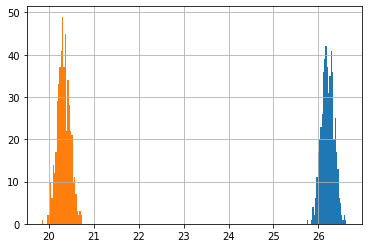

In [68]:
july_score_means.hist(bins = 30)
sample_means_jan.hist(bins = 30)

What do you think this difference in means implies about the distributions of the January and July inspection scores?  Do you think the scores have the same distribution?

Let's plot the histograms of the distributions of the January and July scores on the same plot to visually compare:

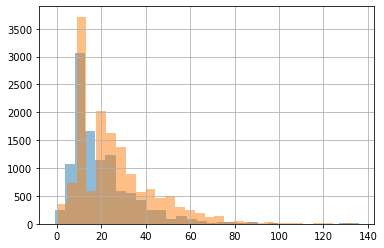

In [74]:
jan_inspections["SCORE"].hist(bins = 30, alpha = 0.5)
july_data["SCORE"].hist(bins = 30, alpha = 0.5)

Recall we can make the histograms transparent by adding the parameter `alpha = 0.5`.

### If you are finished early:
- Is there a statistically significant difference in the means of the January scores and the February scores?
- In Lab 4, we fit a normal distribution to the babies' weights.  If we take a sample of size 44 from that fitted normal distribution, how does its mean compare to the mean of the babies weights?  Does this result tell us anything about whether the babies' weights come from a normal distribution? 